In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('/Users/saksham_diwan/Desktop/Housing.csv')
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
housing_data_train = housing_data.get(['price', 'area', 'bedrooms'])

In [7]:
housing_data_train = housing_data_train.assign(price=housing_data_train.get('price')/1000000)
housing_data_train = housing_data_train.assign(area=housing_data_train.get('area')/1000)
housing_data_train 

,price,area,bedrooms
0,13.30000,7.42,4
1,12.25000,8.96,4
2,12.25000,9.96,3
3,12.21500,7.50,4
4,11.41000,7.42,4
...,...,...,...
540,1.82000,3.00,2
541,1.76715,2.40,3
542,1.75000,3.62,2
543,1.75000,2.91,3


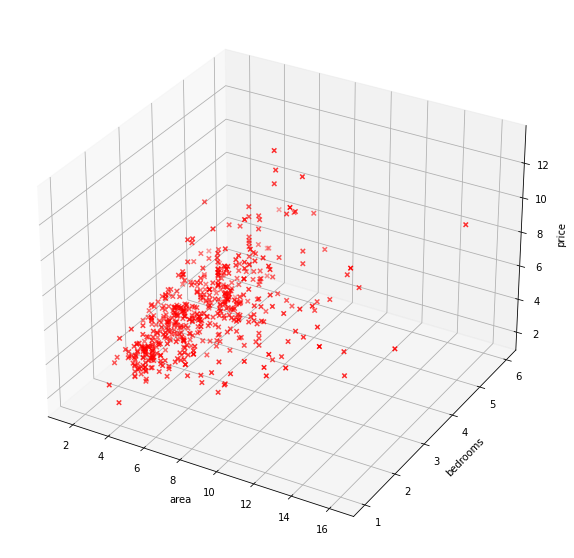

In [19]:
fig, ax = plt.subplots(subplot_kw = {"projection" : "3d"})
ax.scatter(housing_data_train.get('area'), housing_data_train.get('bedrooms'), housing_data_train.get('price'), marker = 'x', c = 'r');
ax.set(xlabel = 'area', ylabel = 'bedrooms', zlabel = 'price');
plt.rcParams['figure.figsize'] = (20, 10)

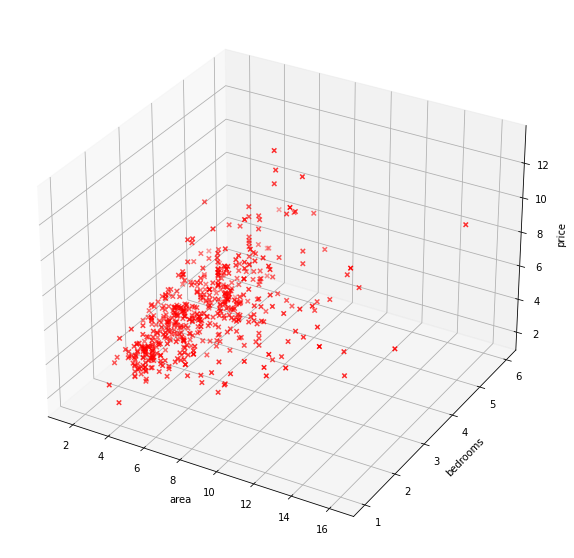

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(housing_data_train.get('area'), housing_data_train.get('bedrooms'), housing_data_train.get('price'), marker = 'x', c = 'r');
ax.set(xlabel = 'area', ylabel = 'bedrooms', zlabel = 'price');
plt.rcParams['figure.figsize'] = (20, 10)

In [26]:
x_train = np.c_[np.array(housing_data_train.get('area')), np.array(housing_data_train.get('bedrooms'))]
x_train

array([[7.42, 4.  ],
       [8.96, 4.  ],
       [9.96, 3.  ],
       ...,
       [3.62, 2.  ],
       [2.91, 3.  ],
       [3.85, 3.  ]])

In [27]:
y_train = np.array(housing_data_train.get('price'))
y_train

array([13.3    , 12.25   , 12.25   , 12.215  , 11.41   , 10.85   ,
       10.15   , 10.15   ,  9.87   ,  9.8    ,  9.8    ,  9.681  ,
        9.31   ,  9.24   ,  9.24   ,  9.1    ,  9.1    ,  8.96   ,
        8.89   ,  8.855  ,  8.75   ,  8.68   ,  8.645  ,  8.645  ,
        8.575  ,  8.54   ,  8.463  ,  8.4    ,  8.4    ,  8.4    ,
        8.4    ,  8.4    ,  8.295  ,  8.19   ,  8.12   ,  8.08094,
        8.043  ,  7.98   ,  7.9625 ,  7.91   ,  7.875  ,  7.84   ,
        7.7    ,  7.7    ,  7.56   ,  7.56   ,  7.525  ,  7.49   ,
        7.455  ,  7.42   ,  7.42   ,  7.42   ,  7.35   ,  7.35   ,
        7.35   ,  7.35   ,  7.343  ,  7.245  ,  7.21   ,  7.21   ,
        7.14   ,  7.07   ,  7.07   ,  7.035  ,  7.     ,  6.93   ,
        6.93   ,  6.895  ,  6.86   ,  6.79   ,  6.79   ,  6.755  ,
        6.72   ,  6.685  ,  6.65   ,  6.65   ,  6.65   ,  6.65   ,
        6.65   ,  6.65   ,  6.629  ,  6.615  ,  6.615  ,  6.58   ,
        6.51   ,  6.51   ,  6.51   ,  6.475  ,  6.475  ,  6.44

In [28]:
def cost_func(x_set, y_set, w, b):
    m = x_set.shape[0]
    cost = 0.0
    for i in range(m):
        f_x = np.dot(x_set[i], w) + b
        sq_error = (f_x - y_set[i])**2
        cost = cost + sq_error
    cost = cost/(2*m)
    return cost   

In [29]:
def gradient_func(x_set, y_set, w, b):
    m = x_set.shape[0]
    n = x_set.shape[1]
    dj_dw = np.zeros_like(w)
    dj_db = 0
    for i in range(m):
        f_x = np.dot(x_set[i], w) + b
        resid = f_x - y_set[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + resid * x_set[i,j]
        dj_db = dj_db + resid
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db        

In [31]:
def gradient_descent_func(x_set, y_set, w, b, alpha, num_iter):
    j_hist = np.array([])
    w_work = w
    b_work = b
    
    for i in range(num_iter):
        dj_dw, dj_db = gradient_func(x_set, y_set, w_work, b_work)
        
        w_work = w_work - alpha * dj_dw
        b_work = b_work - alpha * dj_db
        
        j_hist = np.append(j_hist, cost_func(x_set, y_set, w_work, b_work))
        
    return w_work, b_work, j_hist

In [32]:
w_init = np.zeros(x_train.shape[1])
b_init = 0
alpha_value = 0.01
iterations = 10000
w, b, cost_array = gradient_descent_func(x_train, y_train, w_init, b_init, alpha_value, iterations)
print(w)
print(b)

[0.42384362 0.74000913]
0.38939655744032303


In [39]:
x = np.array(housing_data_train.get('area'))
y = np.array(housing_data_train.get('bedrooms'))
z = w[0]*x + w[1]*y + b

In [33]:
pred_array = np.array([])
for i in range(x_train.shape[0]):
    pred_array = np.append(pred_array, (np.dot(x_train[i], w) + b))
housing_data_train = housing_data_train.assign(predictions = pred_array)
housing_data_train

,price,area,bedrooms,predictions
0,13.30000,7.42,4,6.494353
1,12.25000,8.96,4,7.147072
2,12.25000,9.96,3,6.830906
3,12.21500,7.50,4,6.528260
4,11.41000,7.42,4,6.494353
...,...,...,...,...
540,1.82000,3.00,2,3.140946
541,1.76715,2.40,3,3.626649
542,1.75000,3.62,2,3.403729
543,1.75000,2.91,3,3.842809


In [56]:
X,Y = np.meshgrid(x,y)
Z = w[0] * X + w[1] * Y + b

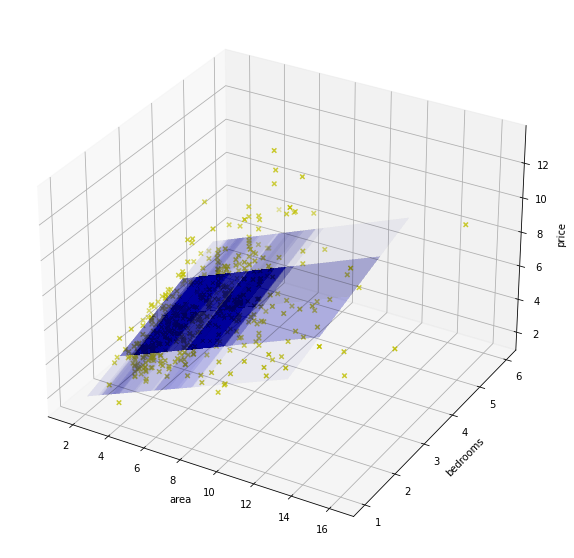

In [69]:
fig, ax = plt.subplots(subplot_kw = {"projection" : "3d"})
ax.plot_surface(X, Y, Z, color = 'b', alpha = 0.01);
ax.scatter(housing_data_train.get('area'), housing_data_train.get('bedrooms'), housing_data_train.get('price'), marker = 'x', c = 'y');
ax.set(xlabel = 'area', ylabel = 'bedrooms', zlabel = 'price');
plt.rcParams['figure.figsize'] = (20, 10)

In [48]:
from mpl_toolkits.mplot3d import axes3d